# Intento 2: Algoritmo de Lanczos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nbimporter
import Funciones

Intentemos calcular los coeficientes de lanczos directamente al aplicar el algoritmo de Lanczos. Para esto tomemos como ejemplo los siguientes valores:

In [2]:
N = 4 #Intentemos con N pequeños solo para ver que sucede
t1 = 0.5
t2 = 1

In [3]:
D, U, H = Funciones.Diagonalizar(Funciones.H_t1_t2(N, t1,t2))
Vec_Est_Base, lambda_Base = Funciones.Estado_Base(D,U)

Apliquemos Lanczos, para esto creemos una matriz donde podamos guardar cada vector

In [4]:
def M_Lanczos(N, H, Vec_Est_Base):
        
    Lanczos_Matriz = np.asmatrix(np.zeros([N,N]))
    a_coef = np.array([])
    b_coef = np.array([0])

    u_0 = Vec_Est_Base/np.linalg.norm(Vec_Est_Base)
    Lanczos_Matriz[:,0] = u_0
    
    for k in range(1,N):
    
        u_kminus2 = Lanczos_Matriz[:,k-2]
        u_kminus1 = Lanczos_Matriz[:,k-1]
        b_kminus1 = b_coef[k-1]

        a_kminus1 = float(np.transpose(u_kminus1)@H@u_kminus1)
        if(k ==1):
            u_k = (H - np.identity(N)*a_kminus1)@u_kminus1
        else:
            u_k = (H - np.identity(N)*a_kminus1)@u_kminus1 - b_kminus1*u_kminus2
            
        if(np.isclose(np.linalg.norm(u_k),0)): #Esto permite evidenciar el error
            print(f'Error: u_{k} es nulo')
        
        b_k = float(np.linalg.norm(u_k))
        u_k = u_k/b_k
        Lanczos_Matriz[:,k] = u_k

        a_coef = np.append(a_coef, a_kminus1)
        b_coef = np.append(b_coef,b_k)
    
    return Lanczos_Matriz, a_coef, b_coef, H

Este era el código que tenía que parecia funcionar pero tenía muchas cosas que no cuadraban, me di cuenta que cuando u_0 es un vector propio aparece un error, veamoslo:

In [5]:
Lanczos_Matriz, a_coef, b_coef, H = M_Lanczos(N, H, Vec_Est_Base)

Error: u_1 es nulo


Si u_1 es nulo entonces normalizarlo con b_1 es una división por cero, dañando de ahí en adelante cualquier calculo para la base. Veamos este problema de manera manual:

In [6]:
u_0 = Vec_Est_Base
a_0 = float(np.transpose(u_0)@H@u_0)
Lanczos_Matriz[:,0] = u_0

In [7]:
#Problema: 
H@u_0, a_0*u_0

(matrix([[0.13529903],
         [0.05604269],
         [0.05604269],
         [0.13529903]]),
 matrix([[0.13529903],
         [0.05604269],
         [0.05604269],
         [0.13529903]]))

In [8]:
print(H@u_0 - a_0*u_0, np.linalg.norm(H@u_0 - a_0*u_0))

[[-2.77555756e-17]
 [-1.11022302e-16]
 [ 9.02056208e-17]
 [ 0.00000000e+00]] 1.457167719820518e-16


Entonces, u_0 no puede ser un vector propio, intentemos con un vector aleatorio de N componentes.

In [9]:
u_0 = np.transpose(np.array([np.random.random(N)]))

In [10]:
u_0

array([[0.23887474],
       [0.34226836],
       [0.95684093],
       [0.97541805]])

In [11]:
Lanczos_Matriz, a_coef, b_coef, H = M_Lanczos(N, H, u_0)

Efectivamente ahí no aparece ningún error.

In [12]:
Funciones.revisar_ortogonalidad(Lanczos_Matriz)

< u_0| u_0> = 0.9999999999999999
< u_0| u_1> = -2.7755575615628914e-17
< u_0| u_2> = -2.7755575615628914e-17
< u_0| u_3> = -5.551115123125783e-17
< u_1| u_0> = -2.7755575615628914e-17
< u_1| u_1> = 0.9999999999999998
< u_1| u_2> = 0.0
< u_1| u_3> = 1.887379141862766e-15
< u_2| u_0> = -2.7755575615628914e-17
< u_2| u_1> = 0.0
< u_2| u_2> = 1.0
< u_2| u_3> = 5.551115123125783e-17
< u_3| u_0> = -5.551115123125783e-17
< u_3| u_1> = 1.887379141862766e-15
< u_3| u_2> = 5.551115123125783e-17
< u_3| u_3> = 0.9999999999999998


In [13]:
Funciones.revisar_tridiagonal(Lanczos_Matriz, a_coef, b_coef, H)

|| H|u_1> - (a_1|u_1> + b_2|u_2 + b_1|u_0>) || = 2.29462674786607e-16
|| H|u_2> - (a_2|u_2> + b_3|u_3 + b_2|u_1>) || = 1.1210126175528405e-16


Todo se ve bien, ahora sí, intentemos para un N más grande:

In [14]:
N = 200 
t1 = 0.5
t2 = 1.2
D, U, H = Funciones.Diagonalizar(Funciones.H_t1_t2(N, t1,t2))
u_0 = np.transpose(np.array([np.random.random(N)]))
Lanczos_Matriz, a_coef, b_coef, H = M_Lanczos(N, H, u_0)

In [15]:
Funciones.revisar_ortogonalidad(Lanczos_Matriz)

< u_0| u_0> = 1.0
< u_0| u_1> = -5.204170427930421e-17
< u_0| u_2> = 1.249000902703301e-16
< u_0| u_3> = 2.0816681711721685e-16
< u_0| u_4> = 5.551115123125783e-17
< u_0| u_5> = -1.5612511283791264e-16
< u_0| u_6> = 5.620504062164855e-16
< u_0| u_7> = -4.440892098500626e-16
< u_0| u_8> = 6.201636426617085e-16
< u_0| u_9> = 1.033895191682177e-15
< u_0| u_10> = 4.85722573273506e-17
< u_0| u_11> = -1.1102230246251565e-15
< u_0| u_12> = 1.27675647831893e-15
< u_0| u_13> = 1.7728873924482969e-15
< u_0| u_14> = -6.036837696399289e-16
< u_0| u_15> = -1.5681900222830336e-15
< u_0| u_16> = 2.3800406090401793e-15
< u_0| u_17> = 2.095545958979983e-15
< u_0| u_18> = -1.4155343563970746e-15
< u_0| u_19> = 1.3530843112619095e-16
< u_0| u_20> = 3.920475055707584e-15
< u_0| u_21> = -2.42861286636753e-15
< u_0| u_22> = -2.213507155346406e-15
< u_0| u_23> = 1.4151874117018792e-14
< u_0| u_24> = 3.4833247397614286e-15
< u_0| u_25> = -3.1655233989624776e-14
< u_0| u_26> = -4.8433479449272454e-15
< u_0| u_

In [16]:
Funciones.revisar_tridiagonal(Lanczos_Matriz, a_coef, b_coef, H)

|| H|u_1> - (a_1|u_1> + b_2|u_2 + b_1|u_0>) || = 1.273641784892889e-16
|| H|u_2> - (a_2|u_2> + b_3|u_3 + b_2|u_1>) || = 1.2342621532099486e-16
|| H|u_3> - (a_3|u_3> + b_4|u_4 + b_3|u_2>) || = 1.0974097085180372e-16
|| H|u_4> - (a_4|u_4> + b_5|u_5 + b_4|u_3>) || = 1.165754827143445e-16
|| H|u_5> - (a_5|u_5> + b_6|u_6 + b_5|u_4>) || = 1.4805549829384212e-16
|| H|u_6> - (a_6|u_6> + b_7|u_7 + b_6|u_5>) || = 1.0862558747369819e-16
|| H|u_7> - (a_7|u_7> + b_8|u_8 + b_7|u_6>) || = 1.269018696756246e-16
|| H|u_8> - (a_8|u_8> + b_9|u_9 + b_8|u_7>) || = 1.160134828296737e-16
|| H|u_9> - (a_9|u_9> + b_10|u_10 + b_9|u_8>) || = 1.7278141905532322e-16
|| H|u_10> - (a_10|u_10> + b_11|u_11 + b_10|u_9>) || = 1.2021724429484176e-16
|| H|u_11> - (a_11|u_11> + b_12|u_12 + b_11|u_10>) || = 1.5494003946763757e-16
|| H|u_12> - (a_12|u_12> + b_13|u_13 + b_12|u_11>) || = 1.1404487596900697e-16
|| H|u_13> - (a_13|u_13> + b_14|u_14 + b_13|u_12>) || = 1.5488252107928326e-16
|| H|u_14> - (a_14|u_14> + b_15|u_15 + 

In [17]:
pd.DataFrame(np.linalg.inv(Lanczos_Matriz)@H@Lanczos_Matriz).head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-4.280900e-01,8.097262e-01,5.171592e-12,8.724951e-12,-3.414846e-12,9.932528e-12,-9.984748e-12,-2.025482e-11,-1.389753e-11,-1.991483e-11,...,1.421399e-11,-2.371460e-12,2.587448e-11,5.468006e-12,8.793261e-13,2.196334e-11,-1.286930e-11,-3.828614e-12,2.183080e-11,19602.157774
1,8.097262e-01,7.145295e-01,8.500287e-01,-9.463731e-12,-1.428888e-11,-9.254625e-12,-5.422963e-12,-9.902268e-12,-3.492913e-12,-4.179522e-12,...,5.017418e-12,2.566127e-11,1.707410e-11,-5.427613e-12,9.527255e-12,8.348063e-12,1.936810e-12,-2.103443e-12,5.452851e-12,10363.364562
2,-8.330401e-12,8.500287e-01,-6.614976e-01,9.755157e-01,-3.523194e-11,-5.975609e-11,3.925675e-12,1.662057e-11,4.685376e-11,1.707305e-11,...,-2.525747e-11,6.385008e-11,-1.191933e-11,-3.454611e-11,3.002719e-12,-3.800952e-11,3.403583e-11,3.322988e-11,-2.246230e-11,-27384.145308
3,-5.158819e-12,-2.069100e-11,9.755157e-01,5.056205e-01,6.325052e-01,-3.541091e-11,6.062218e-12,1.534235e-11,2.181912e-12,-6.041925e-12,...,-5.243163e-11,-2.220265e-11,-7.253208e-11,8.263336e-12,-3.443248e-12,-8.986078e-12,2.728120e-11,6.333010e-12,-2.431770e-11,-27599.458926
4,7.151376e-12,1.946813e-11,3.653142e-12,6.325052e-01,-5.134220e-02,9.520232e-01,-1.052115e-11,-3.518801e-11,-3.335083e-11,-3.867888e-11,...,8.423215e-11,6.492824e-12,1.045812e-10,-4.132664e-11,5.012123e-12,-4.701667e-12,-5.062112e-11,-1.503889e-11,5.195302e-11,64297.513387


In [18]:
pd.DataFrame(a_coef).head()

,0
0,-0.428090
1,0.714530
2,-0.661498
3,0.505620
4,-0.051342


In [19]:
pd.DataFrame(b_coef).head()

,0
0,0.000000
1,0.809726
2,0.850029
3,0.975516
4,0.632505


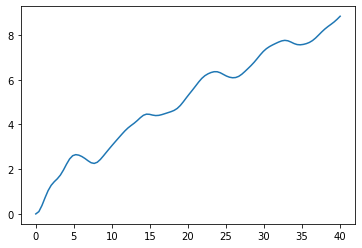

In [20]:
tiempos = np.linspace(0,40,100)
complejidad = Funciones.spread_complexity(tiempos, Lanczos_Matriz, H)
plt.plot(tiempos, complejidad)

En este punto es claro que el único inconveniente ocurre si u_0 es un vector propio de H, consideremos un Quench:

In [21]:
N = 50 #Intentemos con N pequeños solo para ver que sucede

t1_i = 0.5
t2_i = 1.2

t1_f = 1.2
t2_f = 0.5

D_i, U_i, H_i = Funciones.Diagonalizar(Funciones.H_t1_t2(N, t1_i,t2_i))
D_f, U_f, H_f = Funciones.Diagonalizar(Funciones.H_t1_t2(N, t1_f,t2_f))

Vec_Est_Base, lambda_Base = Funciones.Estado_Base(D_i,U_i)

Lanczos_Matriz, a_coef, b_coef, H = M_Lanczos(N, H_f, Vec_Est_Base)

In [22]:
pd.DataFrame(np.linalg.inv(Lanczos_Matriz)@H_f@Lanczos_Matriz)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.523195e-08,9.916667e-01,2.242366e-24,-4.333224e-17,9.815732e-24,1.405232e-17,-2.987650e-23,1.753508e-17,-5.594087e-23,3.112086e-18,...,4.998891e-17,-1.200062e-22,-7.082350e-17,3.249115e-23,-1.875713e-16,2.899320e-23,-6.871967e-17,-6.286145e-24,1.110223e-16,-4.841304e-10
1,9.916667e-01,-2.972037e-08,4.545297e-01,1.129618e-23,-2.149278e-17,8.780328e-24,-7.302973e-17,7.146290e-23,-3.349651e-17,5.418963e-23,...,-3.236578e-22,-2.359865e-17,-1.507559e-22,1.653969e-18,-4.310588e-23,2.030881e-17,-3.333328e-24,5.801566e-17,-2.481542e-24,3.658643e-09
2,-5.127458e-24,4.545297e-01,9.440255e-08,1.200000e+00,-9.499457e-24,-5.653733e-18,9.437964e-23,-3.402466e-17,1.207958e-23,-8.683603e-18,...,-9.654192e-17,2.692285e-22,4.328169e-17,-7.238296e-23,2.365648e-16,-6.170005e-23,-1.679181e-17,1.124107e-23,0.000000e+00,-2.198631e-09
3,5.426944e-18,-2.965140e-24,1.200000e+00,-1.562891e-07,5.000000e-01,-5.012852e-24,1.277758e-16,-1.215066e-22,6.032403e-17,-8.188128e-23,...,6.926585e-22,2.003849e-17,3.177236e-22,-4.711693e-17,7.861805e-23,-1.076359e-16,2.658890e-24,1.967961e-17,3.308722e-24,-1.901212e-09
4,1.455284e-23,1.026532e-17,5.062524e-23,5.000000e-01,4.959090e-07,1.200000e+00,-8.945992e-23,-4.678638e-18,-3.299924e-22,2.046404e-17,...,7.789596e-17,-6.419527e-22,-1.328625e-17,1.719002e-22,-1.528377e-17,1.417410e-22,4.233938e-17,-7.140102e-23,2.220446e-16,-1.097581e-09
5,1.458698e-17,3.859547e-24,4.318690e-17,4.758569e-23,1.200000e+00,-8.186823e-07,5.000000e-01,1.832523e-22,-9.709169e-17,-1.611437e-23,...,-1.655455e-21,1.678078e-17,-7.762508e-22,1.976653e-16,-1.756479e-22,3.848537e-16,3.861529e-23,4.923100e-17,-1.654361e-23,4.479889e-09
6,1.448662e-24,-2.064424e-17,-3.583029e-23,-5.103056e-17,1.759399e-23,5.000000e-01,2.580821e-06,1.200000e+00,8.142296e-22,-4.601584e-18,...,-1.239054e-16,1.531649e-21,3.187336e-16,-3.392699e-22,7.968536e-17,-4.940427e-23,-4.911995e-17,8.026754e-23,6.938894e-18,-2.492610e-09
7,1.009895e-17,-3.309854e-24,7.399918e-18,-4.511773e-23,3.847301e-17,-3.617913e-22,1.200000e+00,-4.245924e-06,5.000000e-01,1.782075e-22,...,4.149651e-21,1.531591e-16,1.249206e-21,1.118461e-16,5.449114e-22,4.079225e-18,9.768298e-23,-1.953535e-18,2.646978e-23,-3.548963e-09
8,-5.749308e-23,2.931409e-19,1.181872e-22,-9.320317e-18,-1.013509e-22,3.590539e-17,3.517272e-22,5.000000e-01,1.327799e-05,1.200000e+00,...,-4.851300e-18,-3.498072e-21,-9.400998e-17,6.734748e-22,1.704402e-16,-3.027754e-22,-1.148540e-18,-2.306750e-22,-6.234039e-18,8.523510e-10
9,-3.179353e-18,3.949438e-23,3.225568e-18,6.869020e-23,9.691040e-18,5.956281e-22,1.203195e-16,-1.767777e-21,1.200000e+00,-2.175113e-05,...,-1.223968e-20,-2.319588e-16,-3.898590e-21,1.852062e-16,-7.555185e-22,2.066611e-17,-3.212586e-22,-1.527756e-17,-1.033976e-24,4.656320e-09


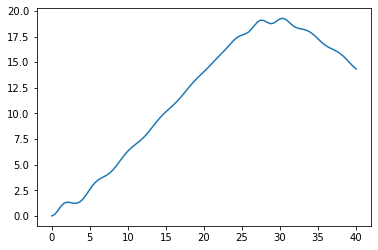

In [23]:
tiempos = np.linspace(0,40,100)
complejidad = Funciones.spread_complexity(tiempos, Lanczos_Matriz, H_f)
plt.plot(tiempos, complejidad)

In [24]:
D_i, U_i, H_i = Funciones.Diagonalizar(Funciones.H_t1_t2(N, t1_f,t2_f))
D_f, U_f, H_f = Funciones.Diagonalizar(Funciones.H_t1_t2(N, t1_i,t2_i))

Vec_Est_Base, lambda_Base = Funciones.Estado_Base(D_i,U_i)

Lanczos_Matriz, a_coef, b_coef, H = M_Lanczos(N, H_f, Vec_Est_Base)

Error: u_25 es nulo


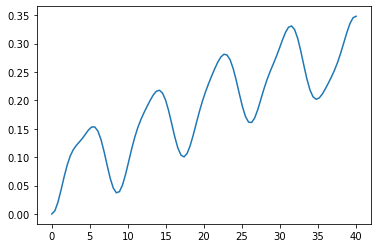

In [25]:
tiempos = np.linspace(0,40,100)
complejidad = Funciones.spread_complexity(tiempos, Lanczos_Matriz[:,:25], H_f)
plt.plot(tiempos, complejidad)

Tratemos de hacer lo mismo usando PBC

In [26]:
N = 6#Intentemos con N pequeños solo para ver que sucede

t1_i = 0.5
t2_i = 1.2

t1_f = 1.2
t2_f = 0.5

D_i, U_i, H_i = Funciones.Diagonalizar(Funciones.H_t1_t2(N, t1_i,t2_i, PBC = True))
D_f, U_f, H_f = Funciones.Diagonalizar(Funciones.H_t1_t2(N, t1_f,t2_f, PBC = True))

Vec_Est_Base, lambda_Base = Funciones.Estado_Base(D_i,U_i)

Lanczos_Matriz, a_coef, b_coef, H = M_Lanczos(N, H_f, Vec_Est_Base)

Error: u_1 es nulo
Error: u_5 es nulo


In [27]:
Vec_Est_Base

matrix([[-0.40824829],
        [ 0.40824829],
        [-0.40824829],
        [ 0.40824829],
        [-0.40824829],
        [ 0.40824829]])

In [28]:
pd.DataFrame(U_i)

,0,1,2,3,4,5
0,0.577350,-0.003678,-0.408248,-0.408248,0.157301,0.577350
1,-0.419676,0.399157,-0.408248,0.408248,0.495834,0.419676
2,-0.288675,0.501829,-0.408248,-0.408248,-0.559735,-0.288675
3,-0.133533,-0.560834,-0.408248,0.408248,-0.504065,0.133533
4,-0.288675,-0.498151,-0.408248,-0.408248,0.402434,-0.288675
5,0.553210,0.161677,-0.408248,0.408248,0.008231,-0.553210


In [29]:
pd.DataFrame(U_f)

,0,1,2,3,4,5
0,0.577350,-0.137077,-0.408248,-0.408248,-0.129513,-0.577350
1,-0.553210,0.291826,0.408248,-0.408248,0.036897,-0.553210
2,-0.288675,0.554241,-0.408248,-0.408248,-0.422501,0.288675
3,0.133533,-0.577339,0.408248,-0.408248,-0.517427,0.133533
4,-0.288675,-0.417165,-0.408248,-0.408248,0.552014,0.288675
5,0.419676,0.285513,0.408248,-0.408248,0.480529,0.419676


In [30]:
N = 100 #Intentemos con N pequeños solo para ver que sucede

t1_i = 0.5
t2_i = 0.9

t1_f = 0.8
t2_f = 0.3

D_i, U_i, H_i = Funciones.Diagonalizar(Funciones.H_t1_t2(N, t1_i,t2_i, PBC = True))
D_f, U_f, H_f = Funciones.Diagonalizar(Funciones.H_t1_t2(N, t1_f,t2_f, PBC = True))

u_0 = np.transpose(np.array([np.random.random(N)]))

Lanczos_Matriz, a_coef, b_coef, H = M_Lanczos(N, H_f, u_0)

Error: u_52 es nulo


In [31]:
Funciones.revisar_ortogonalidad(Lanczos_Matriz)

< u_0| u_0> = 0.9999999999999999
< u_0| u_1> = 5.551115123125783e-17
< u_0| u_2> = 1.3877787807814457e-16
< u_0| u_3> = -1.3877787807814457e-16
< u_0| u_4> = -6.661338147750939e-16
< u_0| u_5> = 3.3306690738754696e-16
< u_0| u_6> = 2.7478019859472624e-15
< u_0| u_7> = 2.7755575615628914e-17
< u_0| u_8> = -2.192690473634684e-15
< u_0| u_9> = -7.632783294297951e-16
< u_0| u_10> = 6.106226635438361e-15
< u_0| u_11> = 2.4841240175987878e-15
< u_0| u_12> = -5.4262150328554526e-15
< u_0| u_13> = -4.485994908876023e-15
< u_0| u_14> = 1.214306433183765e-14
< u_0| u_15> = 6.786238238021269e-15
< u_0| u_16> = -8.805456364058273e-15
< u_0| u_17> = -1.1466522176206695e-14
< u_0| u_18> = 2.0372592501871623e-14
< u_0| u_19> = 1.872807464664561e-14
< u_0| u_20> = -1.7534584895173566e-14
< u_0| u_21> = -2.1749962941797207e-14
< u_0| u_22> = 2.4952262478450393e-14
< u_0| u_23> = 2.6048607715267735e-14
< u_0| u_24> = -2.4646951146678475e-14
< u_0| u_25> = -2.248201624865942e-14
< u_0| u_26> = 3.80598330

In [32]:
pd.DataFrame(np.linalg.inv(Lanczos_Matriz)@H_f@Lanczos_Matriz)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3.405075e-01,5.324959e-01,3.180698e-13,-1.808014e-13,-6.580732e-13,-6.859219e-13,-5.197897e-14,-4.565753e-13,5.131385e-13,-2.794069e-13,...,-1.778374e-13,-9.732442e-13,-2.263406e-13,7.425224e-14,1.474493e-13,-1.016643e-13,1.278977e-13,-1.278977e-13,4.263256e-14,-23.777530
1,5.324959e-01,-5.438902e-01,5.425181e-01,6.199438e-15,-2.212379e-13,-2.645545e-13,-4.354612e-14,-1.424390e-13,1.244118e-13,-1.033268e-13,...,-3.805058e-14,-3.530669e-13,-9.445874e-14,3.380315e-14,2.991383e-14,-1.027630e-13,5.684342e-14,-4.263256e-14,7.283063e-14,-4.131287
2,1.384134e-13,5.425181e-01,5.670129e-01,6.064149e-01,2.388462e-13,2.252695e-13,-6.363769e-14,2.024364e-13,-1.630587e-13,8.428887e-14,...,1.043160e-13,2.998896e-13,-3.340175e-14,-8.113417e-14,-7.168846e-14,6.385994e-14,-3.552714e-14,5.506706e-14,0.000000e+00,17.724916
3,6.271294e-14,-1.766777e-14,6.064149e-01,-4.728830e-01,2.603419e-01,1.145431e-13,2.998625e-14,1.444875e-13,-1.061012e-13,5.353673e-14,...,1.218516e-14,2.280866e-13,5.171493e-14,-1.591507e-15,-1.701311e-14,1.026083e-14,-1.598721e-14,1.021405e-14,5.329071e-15,10.032199
4,-1.975249e-14,5.483366e-14,1.319583e-13,2.603419e-01,1.677209e-01,8.299655e-01,-1.787826e-15,-3.131198e-14,7.069335e-14,-7.024071e-14,...,-5.873634e-15,-1.318752e-13,-1.051875e-13,-3.095129e-14,-1.001641e-14,-2.011177e-14,1.065814e-14,-1.065814e-14,3.352874e-14,1.990754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.548954e-15,-1.930986e-15,-2.116759e-15,-9.044609e-16,-1.499906e-15,2.530034e-15,2.413880e-15,4.015012e-15,-2.711851e-16,1.144340e-15,...,6.914833e-15,1.694932e-15,7.608909e-16,1.101185e-15,8.235550e-01,3.099522e-04,3.084871e-01,4.440892e-16,9.992007e-16,0.158571
96,-1.154572e-15,2.054536e-15,2.093309e-15,-5.338962e-17,2.380658e-15,-1.030520e-15,-2.364985e-15,-1.324300e-15,-1.470894e-15,-2.077435e-16,...,-3.369208e-15,-2.313658e-15,1.049042e-16,-3.777324e-16,1.810495e-15,3.084871e-01,-9.453136e-03,8.272184e-01,-3.885781e-16,-0.507048
97,1.144270e-15,-3.262451e-15,-4.338429e-16,-9.916575e-16,-1.921563e-15,1.224704e-16,1.313037e-15,-4.500023e-16,9.398375e-16,1.134003e-15,...,2.005146e-15,1.586504e-15,-1.056589e-16,-1.928523e-16,-2.133801e-15,-1.243467e-15,8.272184e-01,-9.939814e-02,2.784916e-01,0.083925
98,-2.081668e-16,0.000000e+00,-1.332268e-15,7.546047e-16,9.714451e-16,3.025358e-15,-8.326673e-17,1.054712e-15,-6.106227e-16,3.885781e-16,...,-4.163336e-16,-1.040834e-16,5.551115e-16,9.992007e-16,-6.661338e-16,2.220446e-16,-1.554312e-15,2.784916e-01,2.118285e-01,0.652389


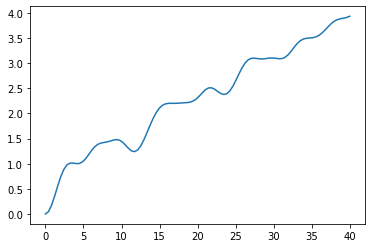

In [33]:
tiempos = np.linspace(0,40,100)
complejidad = Funciones.spread_complexity(tiempos,Lanczos_Matriz[:,:52], H_f)
plt.plot(tiempos, complejidad)

In [34]:
D_i, U_i, H_i = Funciones.Diagonalizar(Funciones.H_t1_t2(N, t1_f,t2_f, PBC = True))
D_f, U_f, H_f = Funciones.Diagonalizar(Funciones.H_t1_t2(N, t1_i,t2_i, PBC = True))

u_0 = np.transpose(np.array([np.random.random(N)]))

Lanczos_Matriz, a_coef, b_coef, H = M_Lanczos(N, H_f, u_0)

Error: u_52 es nulo


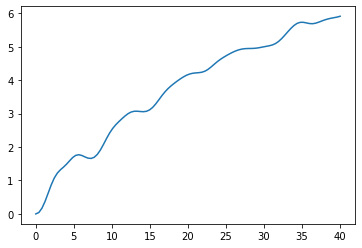

In [35]:
tiempos = np.linspace(0,40,100)
complejidad = Funciones.spread_complexity(tiempos,Lanczos_Matriz[:,:52], H_f)
plt.plot(tiempos, complejidad)